In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('merged_ufc_df.csv')

In [44]:
print(df.shape)
print(df.columns)
df


(35800, 14)
Index(['fighter', 'opponent', 'reach', 'result', 'record', 'method', 'event',
       'date', 'round', 'time', 'opponent_in_data', 'fighter_clean',
       'ranking_date', 'Rank'],
      dtype='object')


,fighter,opponent,reach,result,record,method,event,date,round,time,opponent_in_data,fighter_clean,ranking_date,Rank
0,Eugenio Tadeu,Renan Pitanguy,NaN,Win,1–0,TKO (corner stoppage),Desafio - Jiu-Jitsu vs. Martial Arts,1984-11-30,1.0,5:02,False,EUGENIO TADEU,NaN,NaN
1,James Toney,Arthur Willis,188 cm,NaN,6–0,NaN,NaN,1989-05-02,NaN,NaN,False,JAMES TONEY,NaN,NaN
2,Maurice Smith,Minoru Suzuki,NaN,Win,1–0,KO (punch),UWF U-Cosmos,1989-11-29,4.0,1:05,False,MAURICE SMITH,NaN,NaN
3,Satoshi Honma,Yutaka Fuji,NaN,Win,1-0,Submission (armbar),Shooto - Shooto,1990-05-12,2.0,2:36,False,SATOSHI HONMA,NaN,NaN
4,Don Frye,David Dixon,185 cm,NaN,2–3,NaN,NaN,1990-05-21,NaN,NaN,False,DON FRYE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35795,Diego Brandão,Canaan Kawaihae,175 cm,Win,31–22,TKO (punches),Tuff-N-Uff 145,2025-06-29,4.0,3:34,False,DIEGO BRANDÃO,NaN,NaN
35796,Taylor Lapilus,Ali Taleb,190 cm,Win,22–4,Decision (unanimous),PFL Europe 2 (2025),2025-07-05,3.0,5:00,False,TAYLOR LAPILUS,NaN,NaN
35797,Danny Roberts,Patrick Habirora,188 cm,Loss,18–9,KO (head kick),PFL Europe 2 (2025),2025-07-05,1.0,4:32,False,DANNY ROBERTS,NaN,NaN
35798,Carlos Felipe,Mukhamad Vakhaev,191 cm,NaN,NaN,NaN,ACA 189,2025-07-11,NaN,NaN,False,CARLOS FELIPE,NaN,NaN


# Exploratory Data Analysis

In [45]:
# Normalize fighter/opponent names
df['fighter_clean'] = df['fighter_clean'].astype(str).str.strip().str.title()
df['fighter'] = df['fighter'].astype(str).str.strip().str.title()
df['opponent'] = df['opponent'].astype(str).str.strip().str.title()

In [46]:
# Ensure reach is numeric
# Convert to float, handling strings like 'N/A', '?', etc.
df['reach'] = pd.to_numeric(df['reach'], errors='coerce')

In [47]:
# Standardize categorical fields
# Convert to lowercase and strip for consistency
df['result'] = df['result'].astype(str).str.lower().str.strip()
df['method'] = df['method'].astype(str).str.lower().str.strip()

In [48]:
# Sanity checks 
print(df[['date', 'ranking_date', 'fighter_clean', 'reach', 'result', 'method']].head())
print(df.isnull().sum())  

         date ranking_date  fighter_clean  reach result                 method
0  1984-11-30          NaN  Eugenio Tadeu    NaN    win  tko (corner stoppage)
1  1989-05-02          NaN    James Toney    NaN    nan                    nan
2  1989-11-29          NaN  Maurice Smith    NaN    win             ko (punch)
3  1990-05-12          NaN  Satoshi Honma    NaN    win    submission (armbar)
4  1990-05-21          NaN       Don Frye    NaN    nan                    nan
fighter                 0
opponent                0
reach               35549
result                  0
record                  3
method                  0
event                  25
date                    0
round                 222
time                 1301
opponent_in_data        0
fighter_clean           0
ranking_date        35445
Rank                35445
dtype: int64


In [49]:
df.drop(columns=['Rank', 'ranking_date'], inplace=True, errors='ignore')

# Descriptive Stats & Distributions

## Win/Loss:

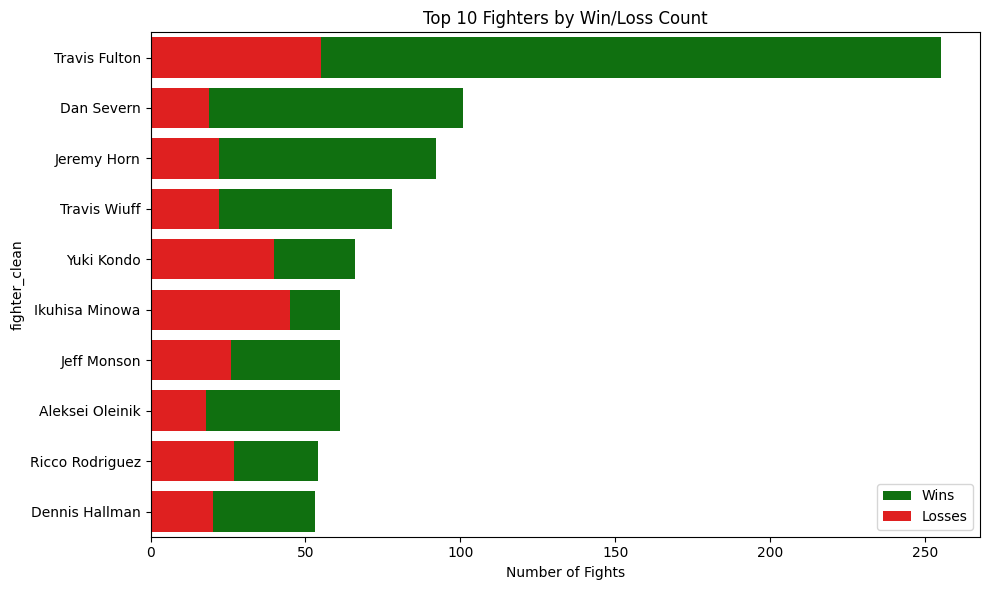

In [51]:
# How many wins/losses per fighter
win_loss_counts = df.groupby(['fighter_clean', 'result']).size().unstack(fill_value=0)

# Win/loss ratio
win_loss_counts['win_loss_ratio'] = win_loss_counts.get('win', 0) / (win_loss_counts.get('loss', 1))

# Top 10 win counts
top_win_counts = win_loss_counts.sort_values(by='win', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_win_counts.index, x=top_win_counts['win'], color='green', label='Wins')
sns.barplot(y=top_win_counts.index, x=top_win_counts['loss'], color='red', label='Losses')
plt.title("Top 10 Fighters by Win/Loss Count")
plt.xlabel("Number of Fights")
plt.legend()
plt.tight_layout()
plt.show()

# Reach Analysis:

/var/folders/bj/d71x7qnx3s5cdq0hnq7fshg80000gn/T/ipykernel_15748/2641514887.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['result'] == 'win']['reach'], label='Winners', shade=True)
/var/folders/bj/d71x7qnx3s5cdq0hnq7fshg80000gn/T/ipykernel_15748/2641514887.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['result'] == 'loss']['reach'], label='Losers', shade=True)


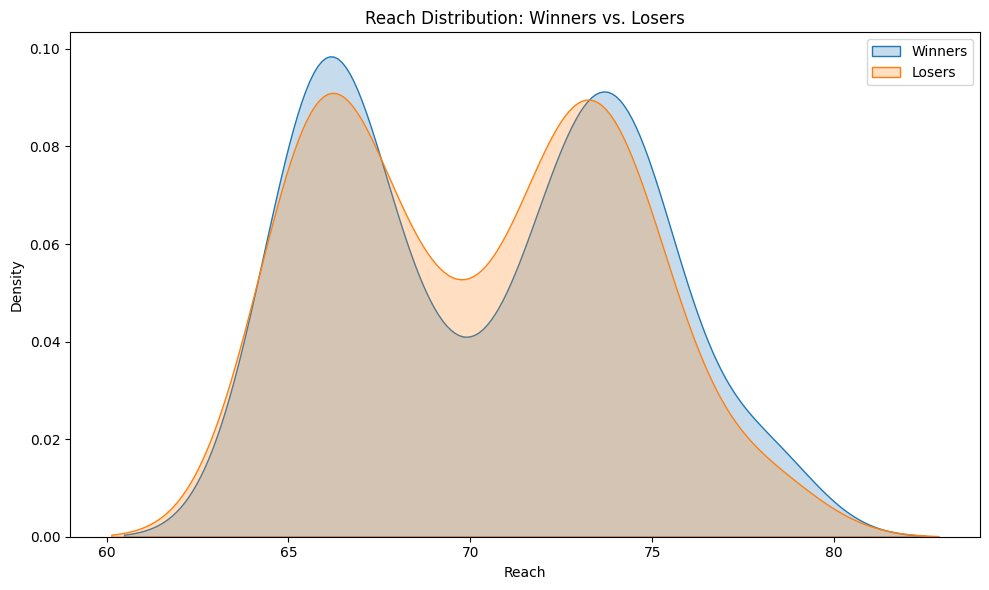

In [ ]:
# Reach analysis: among winners vs loser
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['result'] == 'win']['reach'], label='Winners', shade=True)
sns.kdeplot(df[df['result'] == 'loss']['reach'], label='Losers', shade=True)
plt.title("Reach Distribution: Winners vs. Losers")
plt.xlabel("Reach")
plt.legend()
plt.tight_layout()
plt.show()


## Method of winning:

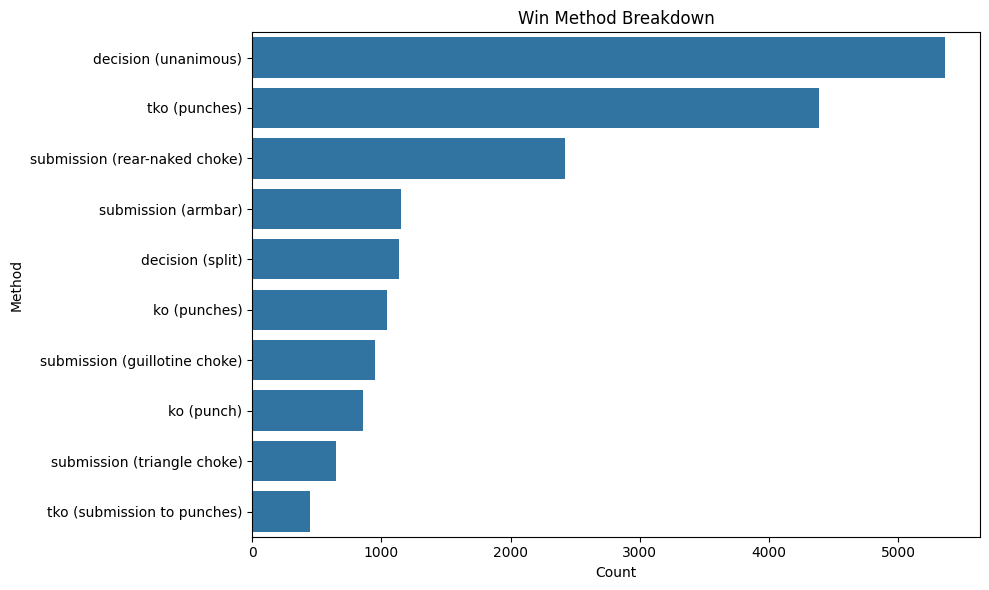

In [ ]:
method_counts = df[df['result'] == 'win']['method'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=method_counts.values, y=method_counts.index)
plt.title("Win Method Breakdown")
plt.xlabel("Count")
plt.ylabel("Method")
plt.tight_layout()
plt.show()